# Hypothesis

Phishing websites have unique features and patterns that can allow a model to distinguish and classify them from legitimate websites. My goal is to demonstrate that a supervised model can be trained to achieve this with relative ease.

## Data Source

- **Phishing Websites Dataset**  
    [Phishing Websites](https://archive.ics.uci.edu/dataset/327/phishing+websites)  
    Mohammad, R. & McCluskey, L. (2012). *Phishing Websites [Dataset]*. UCI Machine Learning Repository. [https://doi.org/10.24432/C51W2X](https://www.semanticscholar.org/paper/An-assessment-of-features-related-to-phishing-using-Mohammad-Thabtah/0c0ff58063f4e078714ea74f112bc709ba9fed06).

- **PhiUSIIL Phishing URL (Website) Dataset**  
    [PhiUSIIL Phishing URL Dataset](https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset)  
    Prasad, A. & Chandra, S. (2024). *PhiUSIIL Phishing URL (Website) [Dataset]*. UCI Machine Learning Repository. [https://doi.org/10.1016/j.cose.2023.103545](https://doi.org/10.1016/j.cose.2023.103545).

# Process Overview

1. **Model Creation**  
    I will design and implement my own supervised machine learning model to classify phishing websites. The model will be trained using the datasets mentioned above.

2. **Outcome Analysis**  
    After training the model, I will analyze its performance using appropriate evaluation metrics such as accuracy, precision, recall, and F1-score. Visualizations will also be used to better understand the model's predictions.

3. **Comparison with Published Results**  
    The performance of my model will be compared with the predictions and results reported in the two referenced papers:
    - *PhiUSIIL Phishing URL Dataset* by Prasad & Chandra (2024)

    This comparison will help assess the effectiveness of my model and identify areas for improvement.

In [6]:

#package to add ucimlrepo to the python path

# !pip install ucimlrepo

#!pip install textblob

#!pip install spacy 

#    !pip install shap


#!pip install "numpy<2"


# download models (run once)
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# spacy.cli.download('en_core_web_sm')

In [108]:
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt_tab')

In [9]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import nltk
import spacy

In [10]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
phishing_websites = fetch_ucirepo(id=327) 

# fetch dataset 
phiusiil_phishing_url_website = fetch_ucirepo(id=967) 
    


## Data Exploration

In [ ]:
# data (as pandas dataframes) 
X1 = phiusiil_phishing_url_website.data.features 
y1 = phiusiil_phishing_url_website.data.targets 
  
# metadata 
print(phiusiil_phishing_url_website.metadata) 
  
# variable information 
print(X1.columns)

print(f"Number of rows in X1: {len(X1)}")
print(f"Number of rows in y1: {len(y1)}")

{'uci_id': 967, 'name': 'PhiUSIIL Phishing URL (Website)', 'repository_url': 'https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/967/data.csv', 'abstract': 'PhiUSIIL Phishing URL Dataset is a substantial dataset comprising 134,850 legitimate and 100,945 phishing URLs. Most of the URLs we analyzed, while constructing the dataset, are the latest URLs. Features are extracted from the source code of the webpage and URL. Features such as CharContinuationRate, URLTitleMatchScore, URLCharProb, and TLDLegitimateProb are derived from existing features.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 235795, 'num_features': 54, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['label'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2024, 'last_updated': 'Sun May 12 

In [12]:
print(y1['label'].unique())

[1 0]


## Targets 
    1 = legitimate
    2 = phishing URL

In [13]:
X1.head()

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,1,0,0,1,34,20,28,119,0,124
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,0,1,50,9,8,39,0,217
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,0,1,10,2,7,42,2,5
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,0,1,1,1,3,27,15,22,1,31
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,1,0,1,244,15,34,72,1,85


## From dataset (page 11 of paper) :
5.3. Dataset validation
- URL verification: All the URLs in the dataset are collected from
valid sources and included in the dataset for verification.
- Null value: There is no null value in the dataset.
- Missing value: There is no missing value in the dataset.
- Duplicate records: All the records in the dataset are unique.
- Zero variance feature: There is no feature in the dataset with identical data values.
- Infinite values: There is no positive or negative infinite value in the
dataset.
- Class imbalance: The dataset has 57% legitimate URLs and 43%
phishing URLs that do not indicate a disproportionate distribution of
class labels


### Verifying the data 

In [14]:
# Check for null values
null_values_X1 = X1.isnull().sum().sum()

# Check for duplicate records
duplicates_X1 = X1.duplicated().sum()

# Check for zero variance features
zero_variance_X1 = (X1.nunique() == 1).sum()

# Check for class imbalance
class_distribution_y1 = y1['label'].value_counts(normalize=True)

# Print results
print(f"Null values in X1: {null_values_X1}")
print(f"Duplicate records in X1: {duplicates_X1}")
print(f"Zero variance features in X1: {zero_variance_X1 * 100} ")
print(f"Class distribution in y1:\n{class_distribution_y1}")


Null values in X1: 0
Duplicate records in X1: 0
Zero variance features in X1: 0 
Class distribution in y1:
label
1    0.571895
0    0.428105
Name: proportion, dtype: float64


## *Note:*
The dataset has undergone significant preprocessing to extract meaningful features from raw data, such as the `Domain` column. Instead of using the domain as a single raw string, it has been split into various derived features to provide a more granular representation. For example:

1. **`NoOfSubDomain`**: Represents the number of subdomains in the URL, derived from the structure of the domain.
2. **`NoOfObfuscatedChar`**: Counts the number of obfuscated characters in the domain, which can indicate phishing attempts.
3. **`IsHTTPS`**: Indicates whether the URL uses HTTPS, a feature derived from the protocol in the URL.
4. **`NoOfDegitsInURL`**: Counts the number of digits in the URL, which can be a sign of obfuscation or phishing.
5. **`NoOfEqualsInURL`, `NoOfQMarkInURL`, `NoOfAmpersandInURL`**: Count the occurrences of specific special characters (`=`, `?`, `&`) in the URL, which are often used in query strings or obfuscation.

These derived features provide a structured and standardized representation of the domain, making it easier for machine learning models to identify patterns and detect phishing attempts.  

Similarly, **`TLD`** is used to create TLDLegitimateProb, which creates a ratio of it's frequency comparing 10 milltions websites where higher TLDLegitimateProb of a URL may indicate a legitimate URL, and a lower TLDLegitimateProb value may help identify phishing URLs

------------------

However, for  **`Title`**, I believe more useful information can be extracted. 

Currently the dataset creates *URLTitleMatchScore* from **`Title`** to identify the discrepancy between the URL and
the webpage title, where a lower score means the 
A lower score can be a sign that the website is a webpage title does not match the content, and vice versa. 



**However, they fail to assess other characteristics.**




## Extra Encoding/Pre-processing Steps for Feature **`Title`**

#### The code below adds new derived features using 
    1. Sentiment Analysis, 
    2. POS Tag Counts 
    3. Word Embedding Averages

In [ ]:
# load spaCy model
nlp = spacy.load('en_core_web_sm')

# ensure Title column
titles = X1['Title'].fillna('')

# 1. Title length & simple metrics

X1['title_length']      = titles.str.len()
X1['title_word_count']  = titles.str.split().apply(len)
X1['title_avg_wordlen'] = X1['title_length'] / X1['title_word_count'].replace(0,1)

# 2. Sentiment analysis & rank

X1['title_polarity']    = titles.apply(lambda t: TextBlob(t).sentiment.polarity)
X1['title_subjectivity']= titles.apply(lambda t: TextBlob(t).sentiment.subjectivity)
X1['title_sentiment_q'] = pd.qcut(
    X1['title_polarity'],
    q=4,
    labels=False,
    duplicates='drop'
)
# 3. POS tag counts (NN, JJ, VB, RB)

docs = list(nlp.pipe(titles, disable=['parser','ner']))

def count_spacy_pos(doc, prefix):
    return sum(1 for token in doc if token.tag_.startswith(prefix))
    
for tag in ['NN','JJ','VB','RB']:
    X1[f"title_{tag.lower()}_count"] = [count_spacy_pos(doc, tag) for doc in docs]    

# 4. Word‐embedding averages via spaCy
embs = np.vstack(titles.apply(lambda t: nlp(t).vector).values)
for i in range(embs.shape[1]):
    X1[f'title_emb_{i}'] = embs[:, i]


/var/folders/4s/xllwf8wx38b2ccq7rm657k_80000gn/T/ipykernel_40573/2549608321.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['title_length']      = titles.str.len()
/var/folders/4s/xllwf8wx38b2ccq7rm657k_80000gn/T/ipykernel_40573/2549608321.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X1[f'title_emb_{i}'] = embs[:, i]
/var/folders/4s/xllwf8wx38b2ccq7rm657k_80000gn/T/ipykernel_40573/2549608321.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

In [16]:
X1.head()

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,title_emb_86,title_emb_87,title_emb_88,title_emb_89,title_emb_90,title_emb_91,title_emb_92,title_emb_93,title_emb_94,title_emb_95
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,0.316315,0.069683,-0.485236,0.749517,-0.354814,0.467513,-0.415161,0.081710,-0.260266,0.483906
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0.306033,-0.231458,-1.055944,0.325950,-0.032376,-0.039097,0.427338,0.023929,-0.038696,-0.148775
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0.894433,-0.203823,-0.719168,0.515357,-0.414274,0.352835,0.299641,-0.045714,-0.018315,0.408518
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,0.133087,0.358561,-0.738890,0.073272,-0.009882,0.248703,0.360680,0.540212,-0.135425,0.205231
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,0.808351,-0.697666,-0.411975,0.702179,-0.387408,-0.057881,0.633690,0.113807,-0.611193,0.171634


In [17]:
title_emb = X1.filter(like='title_emb_')
X1 = X1.drop(columns=title_emb.columns)


In [18]:
X1.head()

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,title_length,title_word_count,title_avg_wordlen,title_polarity,title_subjectivity,title_sentiment_q,title_nn_count,title_jj_count,title_vb_count,title_rb_count
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,487,14,34.785714,0.0,0.0,0,18,4,7,0
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,37,3,12.333333,0.0,0.0,0,4,0,0,0
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,20,3,6.666667,0.0,0.0,0,3,0,0,0
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,51,8,6.375000,0.0,0.0,0,4,2,0,0
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,30,3,10.000000,0.0,0.0,0,1,0,1,0


In [19]:
print( X1['title_sentiment_q'].unique())

X1 = X1.drop(columns=['title_sentiment_q'])

X1 = X1.drop(columns=['Domain','Title','URL','TLD'])


[0 1]


In [22]:
X2 = X1.copy() 
X1.head()


,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,NoOfExternalRef,title_length,title_word_count,title_avg_wordlen,title_polarity,title_subjectivity,title_nn_count,title_jj_count,title_vb_count,title_rb_count
0,31,24,0,100.0,1.000000,0.522907,0.061933,3,1,0,...,124,487,14,34.785714,0.0,0.0,18,4,7,0
1,23,16,0,100.0,0.666667,0.032650,0.050207,2,1,0,...,217,37,3,12.333333,0.0,0.0,4,0,0,0
2,29,22,0,100.0,0.866667,0.028555,0.064129,2,2,0,...,5,20,3,6.666667,0.0,0.0,3,0,0,0
3,26,19,0,100.0,1.000000,0.522907,0.057606,3,1,0,...,31,51,8,6.375000,0.0,0.0,4,2,0,0
4,33,26,0,100.0,1.000000,0.079963,0.059441,3,1,0,...,85,30,3,10.000000,0.0,0.0,1,0,1,0


In [31]:
## SAVE POINT

X1 = X2

X1.head()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,NoOfExternalRef,title_length,title_word_count,title_avg_wordlen,title_polarity,title_subjectivity,title_nn_count,title_jj_count,title_vb_count,title_rb_count
0,31,24,0,100.0,1.000000,0.522907,0.061933,3,1,0,...,124,487,14,34.785714,0.0,0.0,18,4,7,0
1,23,16,0,100.0,0.666667,0.032650,0.050207,2,1,0,...,217,37,3,12.333333,0.0,0.0,4,0,0,0
2,29,22,0,100.0,0.866667,0.028555,0.064129,2,2,0,...,5,20,3,6.666667,0.0,0.0,3,0,0,0
3,26,19,0,100.0,1.000000,0.522907,0.057606,3,1,0,...,31,51,8,6.375000,0.0,0.0,4,2,0,0
4,33,26,0,100.0,1.000000,0.079963,0.059441,3,1,0,...,85,30,3,10.000000,0.0,0.0,1,0,1,0



## Model Selection

Random Forest Classifier as a baseline model. 
Random Forest is a robust and interpretable ensemble learning method that can handle high-dimensional data effectively. It will help establish a benchmark for performance and provide insights into feature importance.



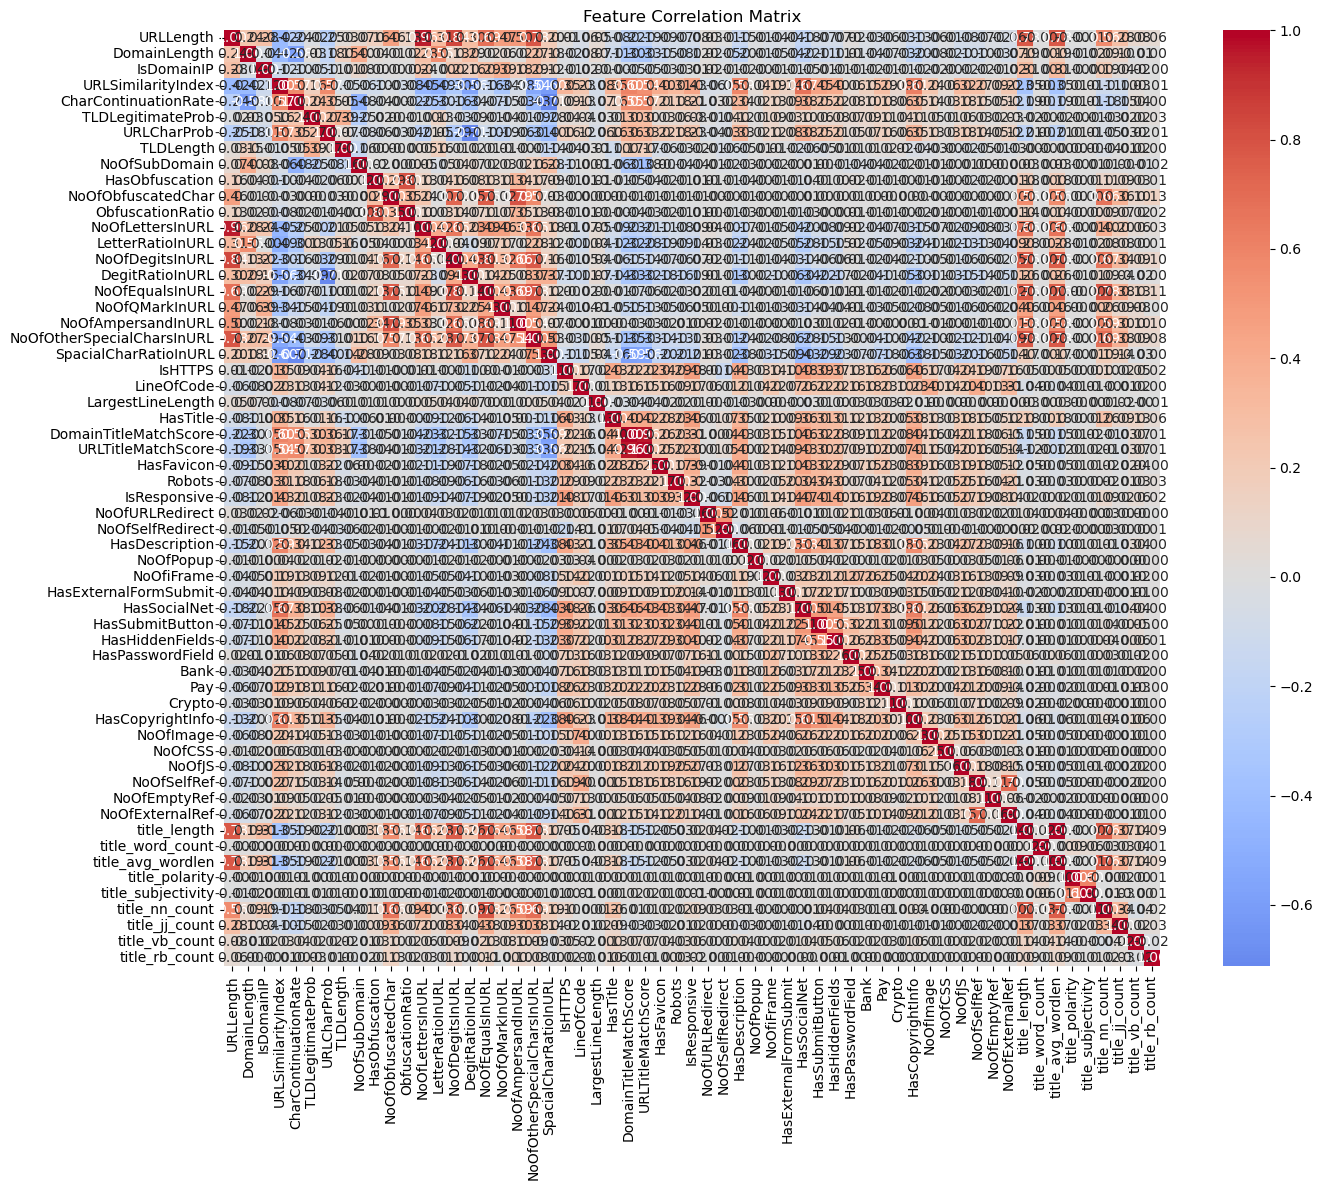

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# compute correlations
corr = X1.corr()

# plot heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

### The correlational matrix is too large to view.

#### Extracting and printing key correlational information below:


In [33]:
import numpy as np

# 1. Correlation of each feature with the target label
label_corr = (
    X1
    .join(y1['label'])
    .corr()['label']
    .drop('label')
    .abs()                     # absolute value
    .sort_values(ascending=False)
)
print("Top 10 features correlated with label:\n", label_corr.head(10), "\n")

# 2. Find highly correlated feature‐feature pairs (|corr| > 0.8)
corr_matrix = X1.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_pairs = (
    upper
    .stack()
    .loc[lambda x: x > 0.8]
    .sort_values(ascending=False)
)
print("Highly correlated feature pairs (|corr| > 0.8):\n", high_pairs)



print("total features: ", len(X1.columns))

Top 10 features correlated with label:
 URLSimilarityIndex       0.860358
HasSocialNet             0.784255
HasCopyrightInfo         0.743358
HasDescription           0.690232
IsHTTPS                  0.609132
DomainTitleMatchScore    0.584905
HasSubmitButton          0.578561
IsResponsive             0.548608
URLTitleMatchScore       0.539419
SpacialCharRatioInURL    0.533537
Name: label, dtype: float64 

Highly correlated feature pairs (|corr| > 0.8):
 title_length           title_avg_wordlen     0.999526
DomainTitleMatchScore  URLTitleMatchScore    0.961008
URLLength              NoOfLettersInURL      0.956047
                       NoOfDegitsInURL       0.835809
NoOfDegitsInURL        NoOfEqualsInURL       0.806024
dtype: float64
total features:  59


In [34]:
#Dropping the title length column

X1 = X1.drop(columns=['title_length'])

### Splitting into training the testing sets

In [35]:
### Slpit the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1['label'], test_size=0.2, random_state=42)

### Scaling

Since the data is a mix of count‐based (e.g. title_length, NN counts), ratio/polarity (−1…+1) and high‑dim embeddings, putting everything on the same scale will be beneficial. 


In [36]:
feature_cols = X_train.columns   
feature_cols

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef', 'title_word_count', 'title_avg_wordlen

In [37]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=feature_cols
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=feature_cols
)

X_train.shape


(188636, 58)

### Applying PCA 
Since currently there is 59 features

In [82]:
### Applying PCA since currently there is 59 features
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, random_state=42)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

print("Original dim:", X_train_scaled.shape)
print("Reduced dim:", X_train_pca.shape)


Original dim: (188636, 58)
Reduced dim: (188636, 42)


# Random Forest Classifer

### RFC ON PCA'd features (reduced to 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay


rf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [20],
    'max_features': ['log2'],
}

# configure GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# fit on training data
grid_search.fit(X_train_pca, y_train)



Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ..max_depth=20, max_features=log2, n_estimators=100; total time= 1.8min
[CV] END ..max_depth=20, max_features=log2, n_estimators=100; total time= 1.8min
[CV] END ..max_depth=20, max_features=log2, n_estimators=100; total time= 1.8min
[CV] END ..max_depth=20, max_features=log2, n_estimators=100; total time= 1.8min
[CV] END ..max_depth=20, max_features=log2, n_estimators=100; total time= 1.8min
[CV] END ..max_depth=20, max_features=log2, n_estimators=200; total time= 2.6min
[CV] END ..max_depth=20, max_features=log2, n_estimators=200; total time= 2.6min
[CV] END ..max_depth=20, max_features=log2, n_estimators=200; total time= 2.6min
[CV] END ..max_depth=20, max_features=log2, n_estimators=200; total time= 2.6min
[CV] END ..max_depth=20, max_features=log2, n_estimators=200; total time= 2.6min


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [20], 'max_features': ['log2'],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

Best parameters: {'max_depth': 20, 'max_features': 'log2', 'n_estimators': 200}
Best CV score: 0.9976780653398676

Test set classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159


Additional Metrics:
Accuracy: 0.9974
F1 Score: 0.9974
Precision: 0.9974
Recall: 0.9974


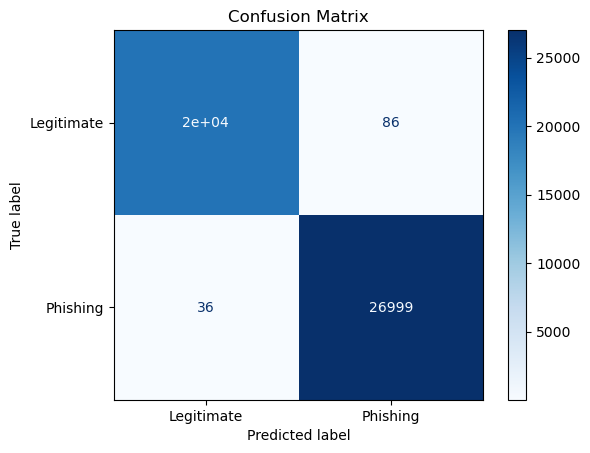

In [107]:
# report best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

# evaluate best estimator on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_pca)

# classification report and confusion matrix
print("\nTest set classification report:\n", classification_report(y_test, y_pred))

# additional metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("\nAdditional Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}"
      )

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Legitimate", "Phishing"], cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


### Running RFC Again, with the following changes:

1. Changing data from PCA to original Data
2. Focusing on 200 estimators to 200 and 500
3. changing max_features from log2 to sqrt

In [53]:

# define parameter grid
param_grid = {
    'n_estimators': [200, 500],
    'max_depth': [10, 20],
    'max_features': ['sqrt'],
}

# configure GridSearchCV
grid_search2 = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# fit on training data
grid_search2.fit(X_train_scaled, y_train)



Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=  21.8s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=  22.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=  22.5s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=  22.7s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=  22.6s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=  23.8s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=  24.5s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=  24.3s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=  25.4s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=  26.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=500; total time=  56.1s
[CV] END ..max_depth=10, max_features=sqrt, n_est

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'max_features': ['sqrt'],
                         'n_estimators': [200, 500]},
             scoring='accuracy', verbose=2)

### for some reason, sqrt and original data ran faster with 20  fits than log2 and PCA with 10 fits, 
This finding will be discussed in supporting paper


In [96]:

# report best parameters and score
print("Best parameters:", grid_search2.best_params_)
print("Best CV score:", grid_search2.best_score_)

# evaluate best estimator on test set
best_rf = grid_search2.best_estimator_


y_pred = best_rf.predict(X_test_scaled)

# classification report and confusion matrix
print("\nTest set classification report:\n", classification_report(y_test, y_pred))

# additional metrics
print("\nAdditional Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")



Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
Best CV score: 1.0

Test set classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159


Additional Metrics:
Accuracy: 0.9974
F1 Score: 0.9974
Precision: 0.9974
Recall: 0.9974


In [103]:

from sklearn.tree import export_text

feature_cols = X_train_scaled.columns
importances = best_rf.feature_importances_

fi = pd.Series(importances, index=feature_cols).sort_values(ascending=False)
print("Top 5 built-in importances:\n", fi.head(5))



Top 5 built-in importances:
 URLSimilarityIndex    0.166922
NoOfExternalRef       0.129639
LineOfCode            0.117124
NoOfSelfRef           0.095230
NoOfImage             0.095005
dtype: float64


In [ ]:
from sklearn.inspection import permutation_importance


perm = permutation_importance(
    best_rf,         # pipeline 
    X_test_scaled, y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)
    
perm_imp = pd.Series(perm.importances_mean, index=X_test.columns)
perm_imp = perm_imp.sort_values(ascending=False)
print("Top 10 permutation importances:\n", perm_imp.head(10))


Top 10 permutation importances:
 URLSimilarityIndex       0.263646
IsHTTPS                  0.072230
LineOfCode               0.000195
LargestLineLength        0.000004
URLLength                0.000000
HasCopyrightInfo         0.000000
NoOfPopup                0.000000
NoOfiFrame               0.000000
HasExternalFormSubmit    0.000000
HasSocialNet             0.000000
dtype: float64


         count      mean       std       min       25%       50%       75%  \
label                                                                        
0.0    64578.0  0.001721  0.886418 -0.363712 -0.357939 -0.225154  0.045226   
1.0    86525.0  0.000223  1.056463 -0.363712 -0.358901 -0.227399  0.045868   

              max  
label              
0.0     65.438509  
1.0    141.614620  


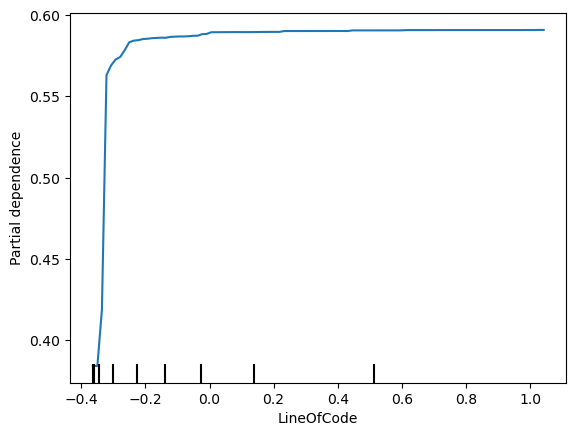

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Combine  feature and label into one DataFrame
df = X_train_scaled.copy()
df['label'] = y_train

# Look at the mean and quartiles of LineOfCode for each class
print(df.groupby('label')['LineOfCode'].describe())


# This will show how the model’s predicted probability of 'phishing' changes
# as LineOfCode goes from its minimum to maximum.
fig, ax = plt.subplots()
PartialDependenceDisplay.from_estimator(
    best_rf,                
    X_train_scaled,        
    ['LineOfCode'],         
    ax=ax,
    kind='average',         
    target=1                
)
ax.set_ylabel("P(phishing)")
plt.show()

         count      mean       std       min       25%       50%       75%  \
label                                                                        
0.0    64578.0  0.002446  1.002085 -2.698946 -0.733539  0.744606  0.744606   
1.0    86525.0 -0.000287  0.998514 -2.691893 -0.735715  0.744606  0.744606   

            max  
label            
0.0    0.744606  
1.0    0.744606  


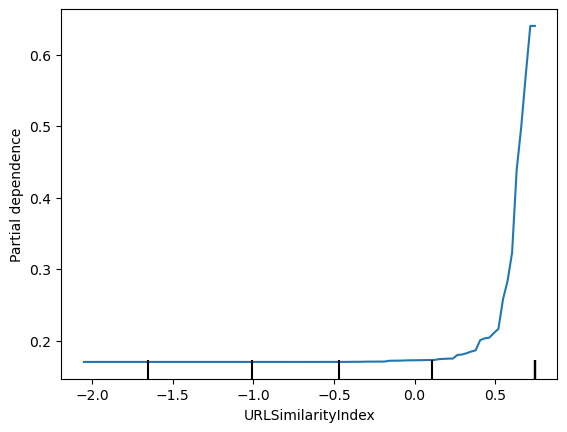

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Combine your feature and label into one DataFrame
df = X_train_scaled.copy()
df['label'] = y_train

# Look at the mean and quartiles of URLSimilarityIndex for each class
print(df.groupby('label')['URLSimilarityIndex'].describe())


# This will show how the model’s predicted probability of 'phishing' changes
# as URLSimilarity Index goes from its minimum to maximum.
fig, ax = plt.subplots()
PartialDependenceDisplay.from_estimator(
    best_rf,                
    X_train_scaled,         
    ['URLSimilarityIndex'],         
    ax=ax,
    kind='average',         
    target=1               
)
ax.set_ylabel("P(phishing)")
plt.show()

## Using RFC on top 5 features only

In [ ]:
# Select top 5 features based on built in importance
top_5_features = fi.head(5).index

# Create a new DataFrame with only the top 5 features
X1_top_5 = X1[top_5_features]

# Split the data into train and test sets using the same indices as before
X_train_top_5 = X_train[top_5_features]
X_test_top_5 = X_test[top_5_features]

rf_top_5 = RandomForestClassifier(random_state=42, n_jobs=-1)
# Perform Grid Search on the top 5 features
param_grid_top_5 = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'max_features': ['sqrt', 'log2'],
}

grid_search_top_5 = GridSearchCV(
    estimator=rf_top_5,
    param_grid=param_grid_top_5,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit Grid Search on training data
grid_search_top_5.fit(X_train_top_5, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   5.3s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   5.6s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   5.7s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   5.7s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   5.8s
[CV] END ..max_depth=10, max_features=log2, n_estimators=100; total time=   5.6s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=  11.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=  11.4s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=  11.7s
[CV] END ..max_depth=10, max_features=log2, n_estimators=100; total time=   6.4s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=  11.6s
[CV] END ..max_depth=10, max_features=log2, n_est

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

Best parameters (top 5 features): {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Best CV score (top 5 features): 0.9999204814933895

Test set classification report (top 5 features):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159


Additional Metrics (top 5 features):
Accuracy: 0.9999
F1 Score: 0.9999
Precision: 0.9999
Recall: 0.9999


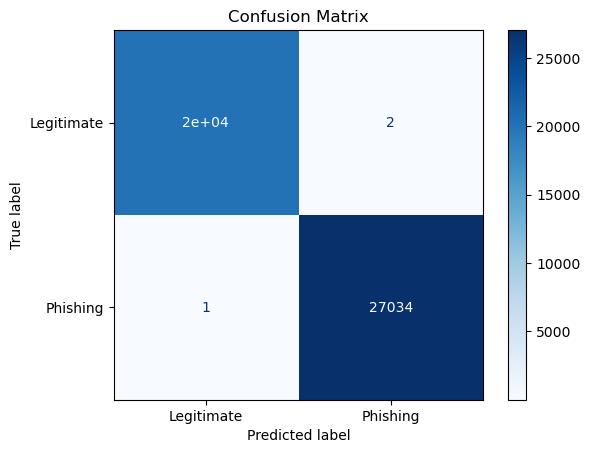

In [78]:
# Report best parameters and score
print("Best parameters (top 5 features):", grid_search_top_5.best_params_)
print("Best CV score (top 5 features):", grid_search_top_5.best_score_)

# Evaluate the best estimator on the test set
best_rf_top_5 = grid_search_top_5.best_estimator_
y_pred_top_5 = best_rf_top_5.predict(X_test_top_5)

# Classification report and additional metrics
print("\nTest set classification report (top 5 features):\n", classification_report(y_test, y_pred_top_5))

accuracy_top_5 = accuracy_score(y_test, y_pred_top_5)
f1_top_5 = f1_score(y_test, y_pred_top_5, average='weighted')
precision_top_5 = precision_score(y_test, y_pred_top_5, average='weighted')
recall_top_5 = recall_score(y_test, y_pred_top_5, average='weighted')

print("\nAdditional Metrics (top 5 features):")
print(f"Accuracy: {accuracy_top_5:.4f}")
print(f"F1 Score: {f1_top_5:.4f}")
print(f"Precision: {precision_top_5:.4f}")
print(f"Recall: {recall_top_5:.4f}")

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_top_5, display_labels=["Legitimate", "Phishing"], cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


### Now, knowing URLSimilarityIndex is a high importance feature, the below experimentation removes this feature

In [91]:
# Select top 5 features based on permutation importance
top_features_minus_Similarity = fi.drop('URLSimilarityIndex').head(5).index

# Create a new DataFrame with only the top 5 features
X1_top_5 = X1[top_features_minus_Similarity]

# Split the data into train and test sets using the same indices as before
X_train_top_5 = X_train[top_features_minus_Similarity]
X_test_top_5 = X_test[top_features_minus_Similarity]

rf_top_5 = RandomForestClassifier(random_state=42, n_jobs=-1)
# Perform Grid Search on the top 5 features
param_grid_top_5 = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'max_features': ['sqrt', 'log2'],
}

grid_search_top_5 = GridSearchCV(
    estimator=rf_top_5,
    param_grid=param_grid_top_5,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit Grid Search on training data
grid_search_top_5.fit(X_train_top_5, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   9.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   9.2s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   9.3s
[CV] END ..max_depth=10, max_features=log2, n_estimators=100; total time=   9.2s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   9.4s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   9.6s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=  18.0s
[CV] END ..max_depth=10, max_features=log2, n_estimators=100; total time=   9.3s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=  18.3s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=  18.3s
[CV] END ..max_depth=10, max_features=log2, n_estimators=100; total time=   9.1s
[CV] END ..max_depth=10, max_features=log2, n_est

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

Best parameters (top 5 features): {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200}
Best CV score (top 5 features): 0.9937975779827367

Test set classification report (top 5 features):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     20124
           1       0.99      1.00      0.99     27035

    accuracy                           0.99     47159
   macro avg       0.99      0.99      0.99     47159
weighted avg       0.99      0.99      0.99     47159


Additional Metrics (top 5 features):
Accuracy: 0.9939
F1 Score: 0.9939
Precision: 0.9939
Recall: 0.9939


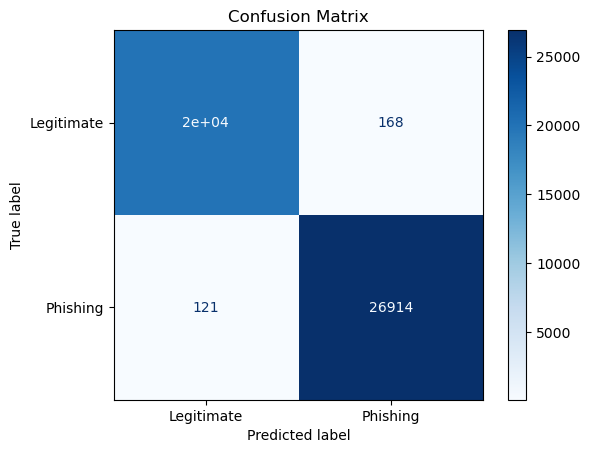

In [92]:
# Report best parameters and score
print("Best parameters (top 5 features):", grid_search_top_5.best_params_)
print("Best CV score (top 5 features):", grid_search_top_5.best_score_)

# Evaluate the best estimator on the test set
best_rf_top_5 = grid_search_top_5.best_estimator_
y_pred_top_5 = best_rf_top_5.predict(X_test_top_5)

# Classification report and additional metrics
print("\nTest set classification report (top 5 features):\n", classification_report(y_test, y_pred_top_5))

accuracy_top_5 = accuracy_score(y_test, y_pred_top_5)
f1_top_5 = f1_score(y_test, y_pred_top_5, average='weighted')
precision_top_5 = precision_score(y_test, y_pred_top_5, average='weighted')
recall_top_5 = recall_score(y_test, y_pred_top_5, average='weighted')

print("\nAdditional Metrics (top 5 features):")
print(f"Accuracy: {accuracy_top_5:.4f}")
print(f"F1 Score: {f1_top_5:.4f}")
print(f"Precision: {precision_top_5:.4f}")
print(f"Recall: {recall_top_5:.4f}")

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_top_5, display_labels=["Legitimate", "Phishing"], cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.tree import export_text

feature_cols = X_train_top_5.columns
importances = best_rf_top_5.feature_importances_

fi = pd.Series(importances, index=feature_cols).sort_values(ascending=False)
print("Top 5 built-in importances:\n", fi.head(50))



Top 5 built-in importances:
 NoOfExternalRef    0.370582
LineOfCode         0.284316
NoOfSelfRef        0.221647
NoOfImage          0.109238
NoOfCSS            0.014217
dtype: float64
